iteration: 0, loss: 16.054005046680867, w: 0.9213160790045805, b: 2.5519969712829442
iteration: 50, loss: 1.723694753834251, w: 1.5001048912887782, b: 1.0006645178422535
iteration: 100, loss: 1.0248984357560358, w: 1.5079695695040798, b: 0.42979426220997896
iteration: 150, loss: 0.9312010543606896, w: 1.5108494162761523, b: 0.220755975080045
iteration: 200, loss: 0.9186377379074933, w: 1.5119039435185357, b: 0.1442114274265337
iteration: 250, loss: 0.9169531986177861, w: 1.512290084793729, b: 0.1161827449496306
iteration: 300, loss: 0.9167273289098045, w: 1.5124314799881013, b: 0.10591934846387156
iteration: 350, loss: 0.9166970434036752, w: 1.5124832553415173, b: 0.10216115157000434
iteration: 400, loss: 0.916692982602916, w: 1.5125022141698796, b: 0.10078499466983278
iteration: 450, loss: 0.9166924381146473, w: 1.51250915641458, b: 0.1002810807272236
iteration: 500, loss: 0.9166923651075009, w: 1.5125116984894678, b: 0.10009656015291689
iteration: 550, loss: 0.9166923553184136, w: 1.

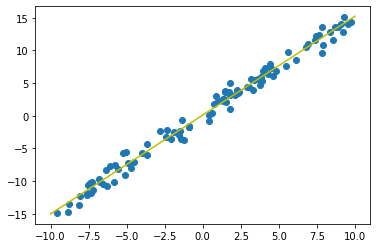

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from numpy import array


class Example1(object):
    data: List = []
    alpha: float = 0.01
    init_b: float = np.random.uniform(0, 5)
    init_w: float = np.random.uniform(0, 5)
    iterations: int = 1000

    def gen_data(self):
        np.random.seed(0)
        for i in range(100):
            x: float = np.random.uniform(-10., 10.)
            # 噪声
            eps: float = np.random.normal(0, 1)
            y: float = 1.477 * x + 0.089 + eps

            self.data.append([x, y])
        return array(self.data)

    @staticmethod
    def cal_mse(b: float, w: float, points: array) -> float:
        total_error: float = 0.
        for i in points:
            x: float = i[0]
            y: float = i[1]
            # 计算差的平方，并累加

            total_error += np.square(y - (w * x + b))

        return total_error / len(points)

    @staticmethod
    def cal_gradient(
            b_cur: float, w_cur: float, points: array, alpha: float
    ) -> [float, float]:
        """
        update variable via gradient descent
        Args:
            b_cur: current value of b
            w_cur: current value of w
            points: training data
            alpha: learning rate

        Returns: [new_b, new_w]

        """
        b_gradient: float = 0.
        w_gradient: float = 0.

        points_num: int = points.__len__()

        for i in points:
            x: float = i[0]
            y: float = i[1]

            b_gradient += (2 / points_num) * (w_cur * x + b_cur - y)
            w_gradient += (2 / points_num) * x * (w_cur * x + b_cur - y)

        new_b: float = b_cur - alpha * b_gradient
        new_w: float = w_cur - alpha * w_gradient

        return [new_b, new_w]

    def gradient_descent(
            self, points: array, init_b: float, init_w: float, alpha: float, iterations: int
    ) -> [float, float]:
        """
        training data via gradient descent
        Args:
            points: training data
            init_b: initial value of b
            init_w: initial value of w
            alpha: learning rate
            iterations: number of iterations

        Returns: [b, w]

        """

        b: float = init_b
        w: float = init_w

        for i in range(iterations):
            b, w = self.cal_gradient(b, w, points, alpha)
            loss: float = self.cal_mse(b, w, points)

            if i % 50 == 0:
                print(f"iteration: {i}, loss: {loss}, w: {w}, b: {b}")

        return [b, w]

    def run(self):
        points: array = self.gen_data()
#         print(f"generate data {points}")

        init_b: float = np.random.uniform(0, 5)
        init_w: float = np.random.uniform(0, 5)

        b, w = self.gradient_descent(
            points, init_b, init_w, self.alpha, self.iterations
        )

        loss: float = self.cal_mse(b, w, points)
        print(f"loss: {loss} w: {w} b: {b}")

        plt.scatter(points[:, 0], points[:, 1])
        x = np.linspace(-10, 10, 2000)
        y = w * x + b
        plt.plot(x, y, c='y')
        plt.show()


if __name__ == "__main__":
    e = Example1()
    e.run()